In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
Unnamed: 0     1319 non-null int64
card           1319 non-null object
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(6), object(3)
memory usage: 134.0+ KB


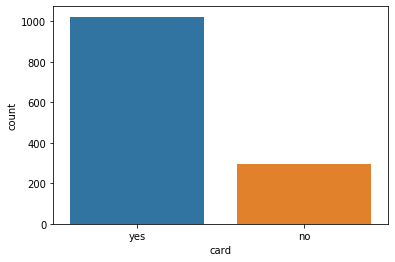

In [6]:
sns.countplot(x='card',data=df)

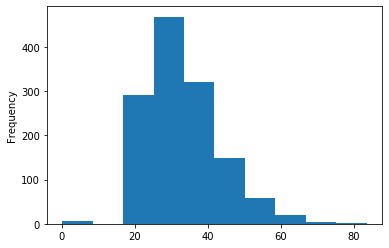

In [7]:
df['age'].plot.hist()

In [8]:
df.isnull().sum()

Unnamed: 0     0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'card', 'reports', 'age', 'income', 'share',
       'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards',
       'active'],
      dtype='object')

In [10]:
card = pd.get_dummies(df["card"],prefix='c',drop_first=True)
card.head()

,c_yes
0,1
1,1
2,1
3,1
4,1


In [11]:
owner= pd.get_dummies(df["owner"],prefix='o',drop_first=True)
owner.head()

,o_yes
0,1
1,0
2,1
3,0
4,1


In [12]:
selfemp = pd.get_dummies(df["selfemp"],prefix='s',drop_first=True)
selfemp.head()

,s_yes
0,0
1,0
2,0
3,0
4,0


In [13]:
df.drop(['card','owner','selfemp'],axis=1,inplace=True)

In [14]:
df = pd.concat([df,card,owner,selfemp],axis=1)

In [15]:
df.head()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active,c_yes,o_yes,s_yes
0,1,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,2,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,3,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,4,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,5,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


In [16]:
X = df.drop('c_yes',axis=1)
X.head()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active,o_yes,s_yes
0,1,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,2,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,3,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,4,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,5,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0


In [17]:
Y = df.iloc[:,11]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: o_yes, dtype: uint8

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=123)

In [20]:
X_train.head()

,Unnamed: 0,reports,age,income,share,expenditure,dependents,months,majorcards,active,o_yes,s_yes
928,929,0,24.50000,2.5,0.233991,487.48170,0,15,0,1,0,0
257,258,1,46.00000,6.0,0.000200,0.00000,2,84,1,46,1,0
83,84,0,29.33333,2.4,0.024945,49.55583,0,30,1,4,0,0
1132,1133,0,33.25000,3.6,0.025991,77.80666,3,16,1,9,0,0
1298,1299,0,58.08333,4.4,0.026596,97.18417,1,132,1,12,1,1


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train,Y_train)

C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Y_predictions = logmodel.predict(X_test)
Y_predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=uint8)

In [25]:
from sklearn.metrics import classification_report

In [26]:
classification_report(Y_test,Y_predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       153\n           1       1.00      1.00      1.00       111\n\n    accuracy                           1.00       264\n   macro avg       1.00      1.00      1.00       264\nweighted avg       1.00      1.00      1.00       264\n'

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(Y_test,Y_predictions)

array([[153,   0],
       [  0, 111]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y_test,Y_predictions)

1.0

In [31]:
import statsmodels.api as sm

In [32]:
import statsmodels.formula.api as smf

In [34]:
model = sm.OLS(Y,X,data = df).fit()
model.params

Unnamed: 0     3.150963e-18
reports        1.075529e-16
age           -1.631724e-16
income         3.729655e-17
share         -2.442491e-15
expenditure   -5.475221e-18
dependents     1.682682e-16
months        -3.491131e-17
majorcards     4.544976e-16
active         7.168745e-16
o_yes          1.000000e+00
s_yes          4.857226e-17
dtype: float64

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  o_yes   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.829e+29
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:46:58   Log-Likelihood:                          41417.
No. Observations:                1319   AIC:                                 -8.281e+04
Df Residuals:                    1307   BIC:                                 -8.275e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Unnamed: 0   3.151e-18    3.9e-19      8.078      0.000    2.39e-18    3.92e-18
reports      1.076e-16    1.2e-16      0.897      0.370   -1.28e-16    3.43e-16
age         -1.632e-16   1.47e-17    -11.084      0.000   -1.92e-16   -1.34e-16
income        3.73e-17   1.16e-16      0.321      0.748   -1.91e-16    2.65e-16
share       -2.442e-15   3.41e-15     -0.716      0.474   -9.13e-15    4.25e-15
expenditure -5.475e-18   1.25e-18     -4.375      0.000   -7.93e-18   -3.02e-18
dependents   1.683e-16   1.35e-16      1.242      0.214   -9.75e-17    4.34e-16
months      -3.491e-17    2.6e-18    -13.417      0.000      -4e-17   -2.98e-17
majorcards   4.545e-16   3.74e-16      1.216      0.224   -2.79e-16    1.19e-15
active       7.169e-16   2.65e-17     27.102      0.000    6.65e-16    7.69e-16
o_yes           1.0000    3.6e-16   2.78e+15      0.000       1.000       1.000
s_yes        4.857e-17   6.16e-16      0.079      0.937   -1.16e-15    1.26e-15
==============================================================================
Omnibus:                       52.043   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.150
Skew:                          -0.167   Prob(JB):                     9.03e-29
Kurtosis:                       4.496   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""